# Practical Exploration of PRISMA Hyperspectral Level 2D Products

## Overview


In [1]:
# define repo name and get root working directory
import os
repo = 'prisma'
root_path = os.getcwd()[ 0 : os.getcwd().find( repo ) + len ( repo )]

In [2]:
# add repo source directory to system path
import sys
sys.path.insert(0, os.path.join( root_path, 'src' ) )

In [4]:
# create prisma object
from prisma import Prisma
obj = Prisma()

In [5]:
# load dataset
pathname = os.path.join( root_path, 'data/PRS_L2D_STD_20200509111537_20200509111541_0001/PRS_L2D_STD_20200509111537_20200509111541_0001.he5')
obj.loadData( pathname )

In [8]:
# get channel indices closest to central wavelengths of sentinel-2 optical channels
s2_rgb_wavelengths = [ 492.4, 559.8, 664.6 ] 
indexes = obj.getVnirChannelIndexes( s2_rgb_wavelengths )

In [10]:
# create 24-bit rgb image    
import rgb
image = rgb.getImage( [ obj._vnir[ 'channels' ][ :,:, idx ] for idx in indexes ]  )

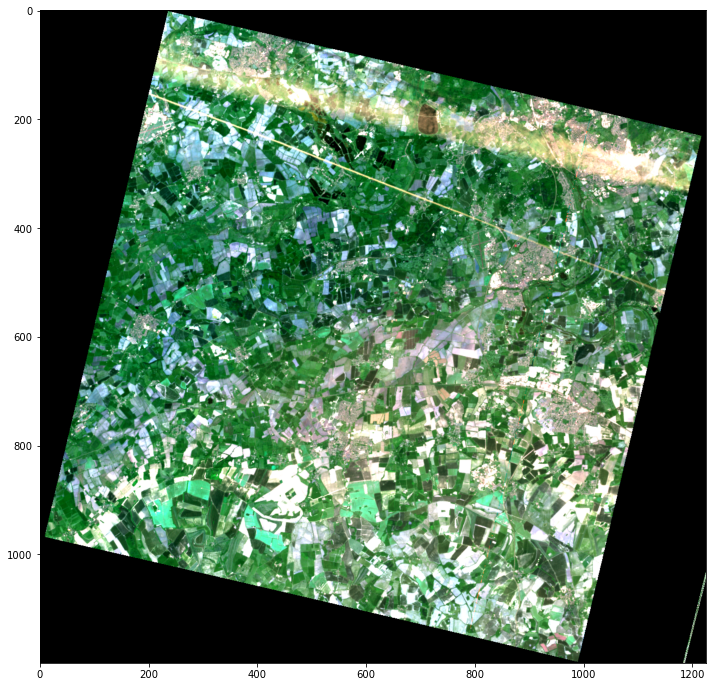

In [12]:
# create plot canvas
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12, 12))
axes.imshow( image )
plt.show()

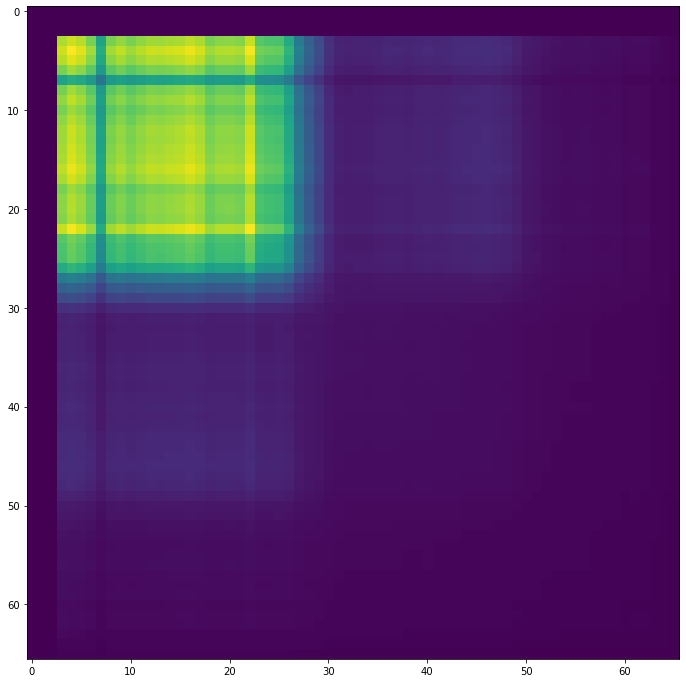

In [22]:
import spectral

# compute pca and retain 99.9% of total image variance
vnir_pc = spectral.principal_components( obj._vnir[ 'channels'] )
vnir_pc = vnir_pc.reduce(fraction=0.999)

# display covariance matrix
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12, 12))
axes.imshow( vnir_pc.cov )
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


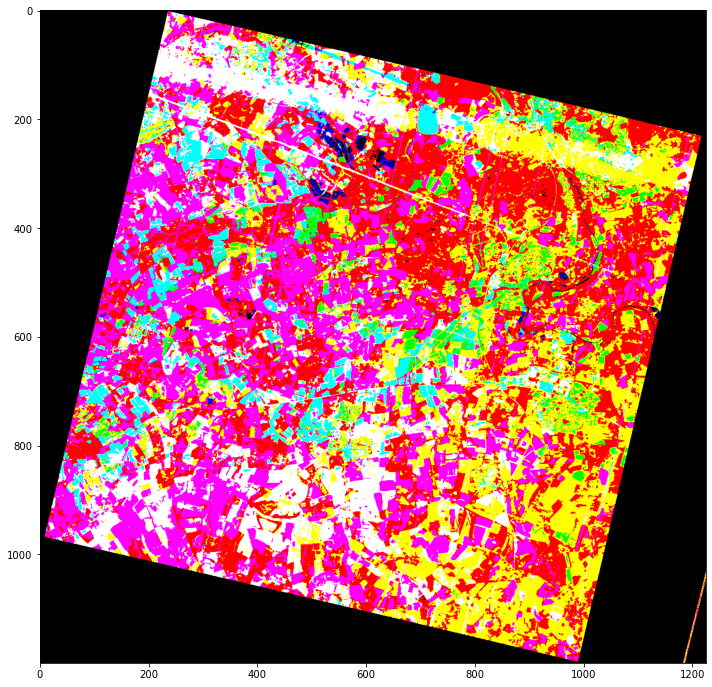

In [24]:
# display 66 vnir bands as first 3 principle components
vnir_tm = vnir_pc.transform( obj._vnir[ 'channels' ] )

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12, 12))
axes.imshow( vnir_tm[:,:,:3] )
plt.show()

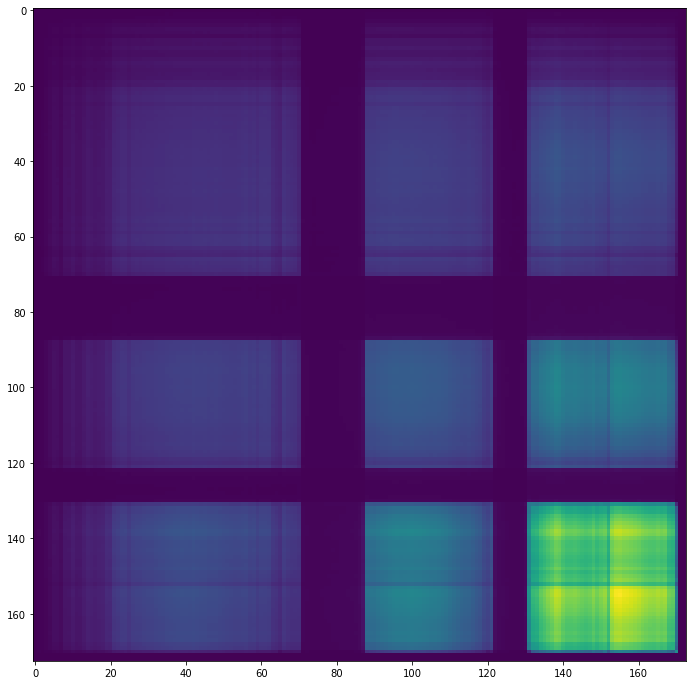

In [26]:
# compute pca and retain 99.9% of total image variance
swir_pc = spectral.principal_components( obj._swir[ 'channels'] )
swir_pc = swir_pc.reduce(fraction=0.999)

# display covariance matrix
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12, 12))
axes.imshow( swir_pc.cov )
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


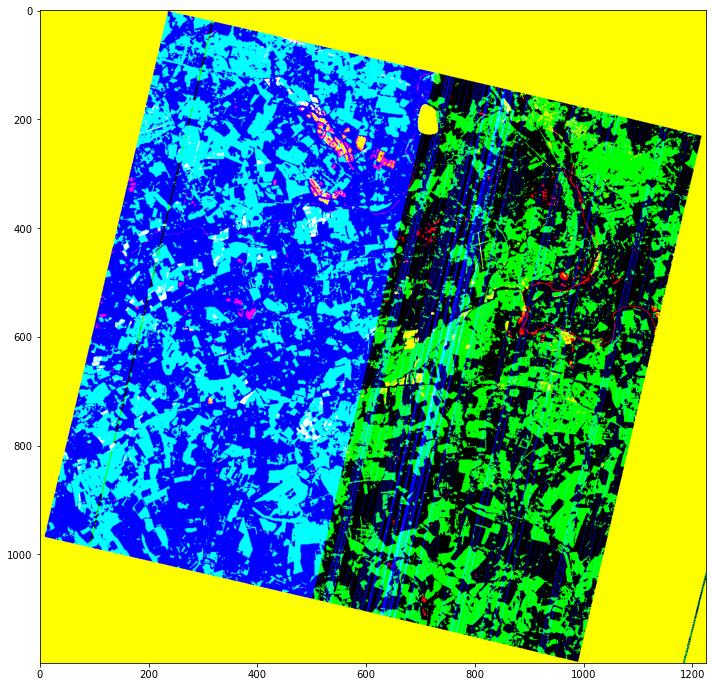

In [27]:
# display 66 vnir bands as first 3 principle components
swir_tm = swir_pc.transform( obj._swir[ 'channels' ] )

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12, 12))
axes.imshow( swir_tm[:,:,:3] )
plt.show()